# Linear Regression Assignment

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("supermarket_sales - Sheet1.csv")

In [5]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### Modifying the Date column to be in a more suitable format

In [6]:
df["Date"] = pd.to_datetime(df["Date"])
df["Date"].dtype

dtype('<M8[ns]')

In [7]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Ordinal Date'] = df['Date'].map(pd.Timestamp.toordinal)

In [8]:
#Sorted by the date of purchase

df_time_sorted = df.sort_values(by='Date')
df_time_sorted.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Year,Ordinal Date
856,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,2019-01-01,19:31,Cash,168.96,4.761905,8.448,6.3,1,2019,737060
567,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,2019-01-01,13:55,Cash,591.66,4.761905,29.583,7.7,1,2019,737060
245,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,2019-01-01,14:47,Cash,380.72,4.761905,19.036,5.7,1,2019,737060
696,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,2019-01-01,20:26,Ewallet,108.16,4.761905,5.408,6.9,1,2019,737060
523,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,2019-01-01,11:43,Cash,125.74,4.761905,6.287,5.0,1,2019,737060


### Sorting for all 3 branches differently

In [9]:
df_sorted_a = df_time_sorted[df_time_sorted['Branch']=='A']
df_sorted_a.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Year,Ordinal Date
567,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,2019-01-01,13:55,Cash,591.66,4.761905,29.583,7.7,1,2019,737060
245,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,2019-01-01,14:47,Cash,380.72,4.761905,19.036,5.7,1,2019,737060
696,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,2019-01-01,20:26,Ewallet,108.16,4.761905,5.408,6.9,1,2019,737060
829,416-17-9926,A,Yangon,Member,Female,Electronic accessories,74.22,10,37.110,779.310,2019-01-01,14:42,Credit card,742.20,4.761905,37.110,4.3,1,2019,737060
17,765-26-6951,A,Yangon,Normal,Male,Sports and travel,72.61,6,21.783,457.443,2019-01-01,10:39,Credit card,435.66,4.761905,21.783,6.9,1,2019,737060


In [10]:
df_sorted_b = df_time_sorted[df_time_sorted['Branch']=='B']
df_sorted_b.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Year,Ordinal Date
856,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.4480,177.4080,2019-01-01,19:31,Cash,168.96,4.761905,8.4480,6.3,1,2019,737060
970,746-04-1077,B,Mandalay,Member,Female,Food and beverages,84.63,10,42.3150,888.6150,2019-01-01,11:36,Credit card,846.30,4.761905,42.3150,9.0,1,2019,737060
450,891-01-7034,B,Mandalay,Normal,Female,Electronic accessories,74.71,6,22.4130,470.6730,2019-01-01,19:07,Cash,448.26,4.761905,22.4130,6.7,1,2019,737060
451,744-09-5786,B,Mandalay,Normal,Male,Electronic accessories,22.01,6,6.6030,138.6630,2019-01-02,18:50,Cash,132.06,4.761905,6.6030,7.6,1,2019,737061
425,198-84-7132,B,Mandalay,Member,Male,Fashion accessories,40.61,9,18.2745,383.7645,2019-01-02,13:40,Cash,365.49,4.761905,18.2745,7.0,1,2019,737061


In [11]:
df_sorted_c = df_time_sorted[df_time_sorted['Branch']=='C']
df_sorted_c.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Year,Ordinal Date
523,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,2019-01-01,11:43,Cash,125.74,4.761905,6.287,5.0,1,2019,737060
496,556-97-7101,C,Naypyitaw,Normal,Female,Electronic accessories,63.22,2,6.322,132.762,2019-01-01,15:51,Cash,126.44,4.761905,6.322,8.5,1,2019,737060
484,493-65-6248,C,Naypyitaw,Member,Female,Sports and travel,36.98,10,18.490,388.290,2019-01-01,19:48,Credit card,369.80,4.761905,18.490,7.0,1,2019,737060
839,271-77-8740,C,Naypyitaw,Member,Female,Sports and travel,29.22,6,8.766,184.086,2019-01-01,11:40,Ewallet,175.32,4.761905,8.766,5.0,1,2019,737060
300,446-47-6729,C,Naypyitaw,Normal,Male,Fashion accessories,99.82,2,9.982,209.622,2019-01-02,18:09,Credit card,199.64,4.761905,9.982,6.7,1,2019,737061


### Using Month-wise sum and mean

In [12]:
month_sum_a = pd.DataFrame(df_sorted_a.groupby("Month")["Total"].sum())
month_mean_a = pd.DataFrame(df_sorted_a.groupby("Month")["Total"].mean())

month_sum_b = pd.DataFrame(df_sorted_b.groupby("Month")["Total"].sum())
month_mean_b = pd.DataFrame(df_sorted_b.groupby("Month")["Total"].mean())

month_sum_c = pd.DataFrame(df_sorted_c.groupby("Month")["Total"].sum())
month_mean_c = pd.DataFrame(df_sorted_c.groupby("Month")["Total"].mean())

In [13]:
from sklearn.linear_model import LinearRegression
lr_a = LinearRegression()
lr_b = LinearRegression()
lr_c = LinearRegression()

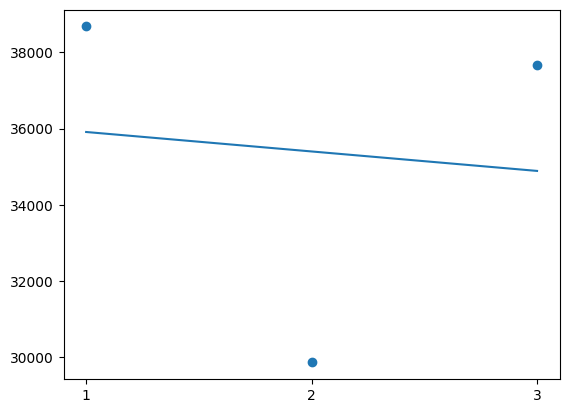

In [14]:
X = (df_sorted_a["Month"].unique().reshape(-1,1))
y = month_sum_a["Total"]
lr_a.fit(X,y)
y_pred = lr_a.predict(X)
plt.scatter(X,y)
plt.plot(X,y_pred)
plt.xticks(df_time_sorted["Month"].unique())
plt.show()

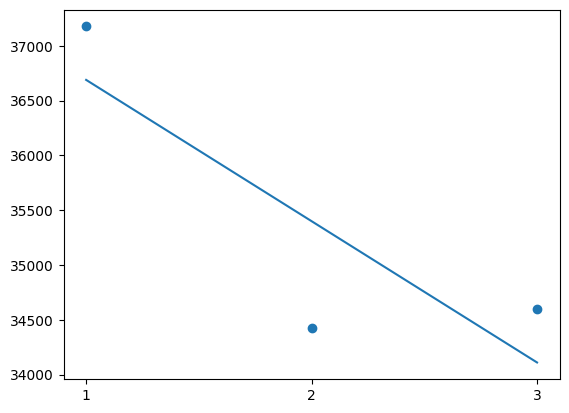

In [15]:
X = (df_sorted_b["Month"].unique().reshape(-1,1))
y = month_sum_b["Total"]
lr_b.fit(X,y)
y_pred = lr_b.predict(X)
plt.scatter(X,y)
plt.plot(X,y_pred)
plt.xticks(df_time_sorted["Month"].unique())
plt.show()

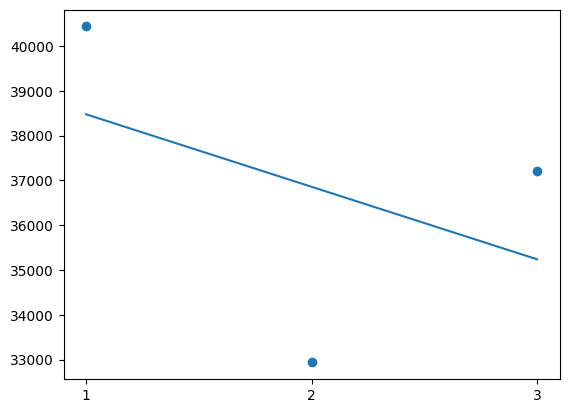

In [16]:
X = (df_sorted_c["Month"].unique().reshape(-1,1))
y = month_sum_c["Total"]
lr_c.fit(X,y)
y_pred = lr_c.predict(X)
plt.scatter(X,y)
plt.plot(X,y_pred)
plt.xticks(df_time_sorted["Month"].unique())
plt.show()

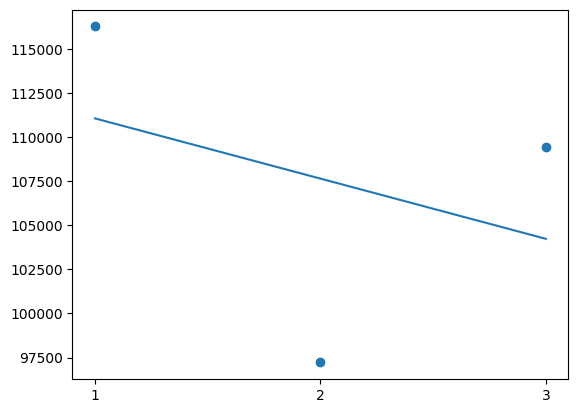

In [17]:
month_sum_total = pd.DataFrame(df_time_sorted.groupby("Month")["Total"].sum())

lr_total = LinearRegression()

X = (df_time_sorted["Month"].unique().reshape(-1,1))
y = month_sum_total["Total"]
lr_total.fit(X,y)
y_pred = lr_total.predict(X)
plt.scatter(X,y)
plt.plot(X,y_pred)
plt.xticks(df_time_sorted["Month"].unique())
plt.show()

In [18]:
X_forecast = np.array((61,62,63)).reshape(-1,1)
y_pred = lr_total.predict(X_forecast)
y_pred

array([ -94017.0665,  -97435.247 , -100853.4275])

The forecasted price is coming negative as the slope of the regression line is very high to interpolate over 6 years

Using regression date vs total of each transaction (This gives us a much more gentle slope)

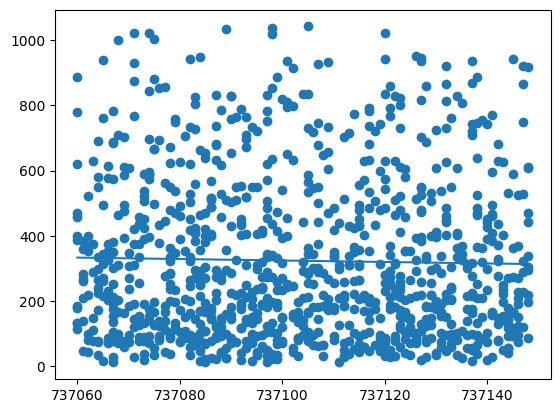

In [19]:
X = df_time_sorted["Ordinal Date"].values.reshape(-1,1)
y = df_time_sorted["Total"].values.reshape(-1,1)
lr_general = LinearRegression()

lr_general.fit(X,y)
y_pred = lr_general.predict(X)
plt.scatter(X,y)
plt.plot(X,y_pred)
plt.show()

In [20]:
X = df_sorted_a["Ordinal Date"].values.reshape(-1,1)
y = df_sorted_a["Total"].values.reshape(-1,1)
lr_a.fit(X,y)

X = df_sorted_b["Ordinal Date"].values.reshape(-1,1)
y = df_sorted_b["Total"].values.reshape(-1,1)
lr_b.fit(X,y)

X = df_sorted_c["Ordinal Date"].values.reshape(-1,1)
y = df_sorted_c["Total"].values.reshape(-1,1)
lr_c.fit(X,y)

LinearRegression()

In [21]:
X_forecast = pd.date_range(start='01/01/2025', end='31/03/2025', freq='D') # Creating synthetic date ranges for the 1st Quarter of 2025
X_forecast = X_forecast.map(pd.Timestamp.toordinal) #Converting to ordinal dates to use for regression
X_forecast

Index([739252, 739253, 739254, 739255, 739256, 739257, 739258, 739259, 739260,
       739261, 739262, 739263, 739264, 739265, 739266, 739267, 739268, 739269,
       739270, 739271, 739272, 739273, 739274, 739275, 739276, 739277, 739278,
       739279, 739280, 739281, 739282, 739283, 739284, 739285, 739286, 739287,
       739288, 739289, 739290, 739291, 739292, 739293, 739294, 739295, 739296,
       739297, 739298, 739299, 739300, 739301, 739302, 739303, 739304, 739305,
       739306, 739307, 739308, 739309, 739310, 739311, 739312, 739313, 739314,
       739315, 739316, 739317, 739318, 739319, 739320, 739321, 739322, 739323,
       739324, 739325, 739326, 739327, 739328, 739329, 739330, 739331, 739332,
       739333, 739334, 739335, 739336, 739337, 739338, 739339, 739340, 739341],
      dtype='int64')

In [22]:
X_forecast = np.array(X_forecast).reshape(-1,1)
y_pred = lr_general.predict(X_forecast)
print (y_pred.sum())

-15158.696707127383


We have the same issue here, interpolating over 6 years is too much for only 3 months on data. So we will conduct the same forecasting but for 2020 1st quarter

In [23]:
X_forecast = pd.date_range(start='01/01/2020', end='31/03/2020', freq='D') # Creating synthetic date ranges for the 1st Quarter of 2020
X_forecast = X_forecast.map(pd.Timestamp.toordinal) 
X_forecast = np.array(X_forecast).reshape(-1,1)
y_pred = lr_general.predict(X_forecast)
print(f"The total sales for the 1st quarter are {y_pred.sum()}")

The total sales for the 1st quarter are 21925.29461787059


In [30]:
X_forecast = pd.date_range(start='01/01/2020', end='31/03/2020', freq='D') # Creating synthetic date ranges for the 1st Quarter of 2020
X_forecast = X_forecast.map(pd.Timestamp.toordinal) 
X_forecast = np.array(X_forecast).reshape(-1,1)
y_pred_a = lr_a.predict(X_forecast)
print(f"The total sales for branch A for the 1st quarter are {y_pred_a.sum()}")

y_pred_b = lr_b.predict(X_forecast)
print(f"The total sales for branch B for the 1st quarter are {y_pred_b.sum()}")

y_pred_c = lr_c.predict(X_forecast)
print(f"The total sales for branch C for the 1st quarter are {y_pred_c.sum()}")

y_pred = y_pred_a + y_pred_b + y_pred_c
print(f"The total sales for the 1st quarter are {y_pred.sum()}")

The total sales for branch A for the 1st quarter are 12884.974238478404
The total sales for branch B for the 1st quarter are 15092.618523367157
The total sales for branch C for the 1st quarter are 40889.14560109703
The total sales for the 1st quarter are 68866.73836294259


# Regularization Assignment

In [25]:
from sklearn.linear_model import Lasso, Ridge

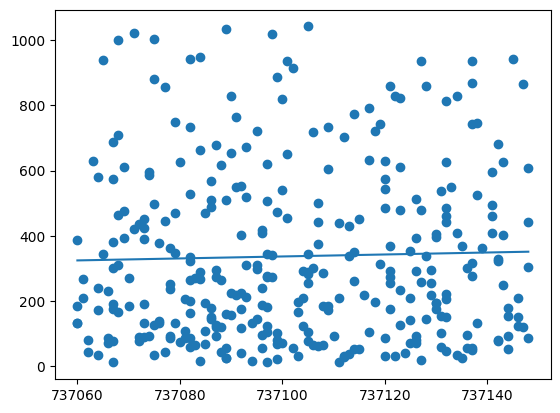

In [28]:
## L1 regularization
lasso = Lasso()
lasso.fit(X, y)
y_pred_l1 = lasso.predict(X)

## Plotting
plt.scatter(X,y)
plt.plot(X,y_pred_l1)
plt.show()

In [31]:
print(f"The total sales for the 1st quarter of 2020 are {lasso.predict(X_forecast).sum()}")

## Creating synthetic data for 1st quarter of 2025
X_forecast_25 = pd.date_range(start='01/01/2025', end='31/03/2025', freq='D') # Creating synthetic date ranges for the 1st Quarter of 2020
X_forecast_25 = X_forecast_25.map(pd.Timestamp.toordinal) 
X_forecast_25 = np.array(X_forecast_25).reshape(-1,1)

print(f"The total sales for the 1st quarter of 2025 are {lasso.predict(X_forecast_25).sum()}")

The total sales for the 1st quarter of 2020 are 40834.20875888408
The total sales for the 1st quarter of 2025 are 90334.70756017603


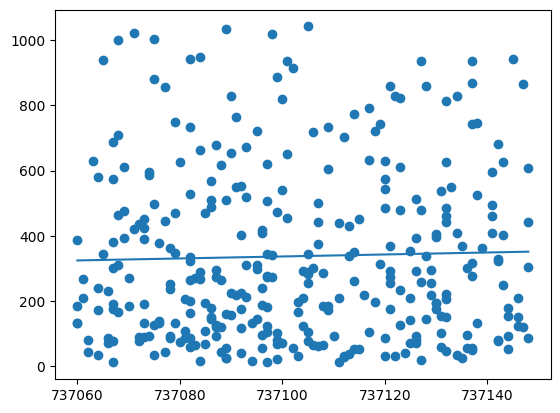

In [32]:
## L1 regularization
ridge = Ridge()
ridge.fit(X, y)
y_pred_l2 = ridge.predict(X)

## Plotting
plt.scatter(X,y)
plt.plot(X,y_pred_l2)
plt.show()

In [33]:
print(f"The total sales for the 1st quarter of 2020 are {ridge.predict(X_forecast).sum()}")

print(f"The total sales for the 1st quarter of 2025 are {ridge.predict(X_forecast_25).sum()}")

The total sales for the 1st quarter of 2020 are 40889.09443330855
The total sales for the 1st quarter of 2025 are 90658.87202318778


### Conclusion
We can clearly observe that the issue of getting negative values when interpolating over 5 years, which we were getting while using only linear regression is no longer present when we use L1 or L2 regularization